In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils
%matplotlib inline

In [2]:
data = loadmat(os.path.join('Data','ex4data1.mat'))
X,y = data['X'],data['y'].ravel()
y[y==10]=0
m = y.size


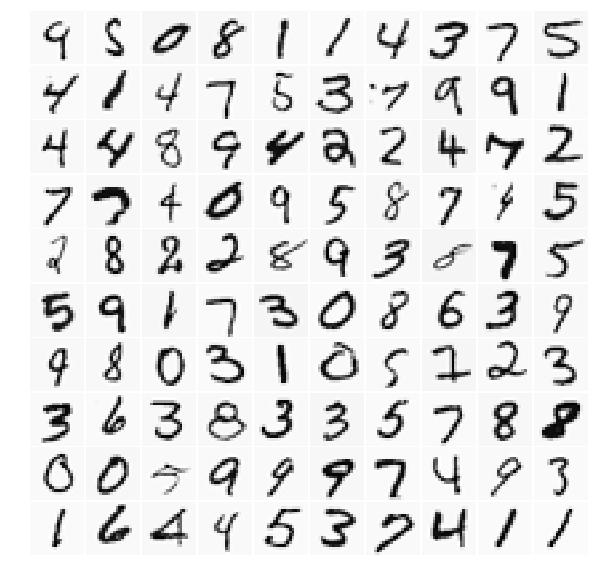

In [3]:
rand_indices = np.random.choice(m,100,replace=False)
sel = X[rand_indices,:]
utils.displayData(sel)

In [4]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
weights = loadmat(os.path.join('Data','ex4weights.mat'))
Theta1, Theta2 = weights['Theta1'],weights['Theta2']
Theta2 = np.roll(Theta2,1,axis=0)
nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [5]:
a = np.array([1,2,3])
b = ([3,4,5])
a*b

array([ 3,  8, 15])

In [ ]:
def sigmoidGradient(z):
    g = np.zeros(z.shape)
    g = utils.sigmoid(z)*(1-uti)

In [6]:
def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_=0.0):
    Theta1 = np.reshape(nn_params[:hidden_layer_size*(input_layer_size+1)],(hidden_layer_size,(input_layer_size+1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size*(input_layer_size+1)):],(num_labels,(hidden_layer_size+1)))
    
    m = y.size
    
    J = 0
    
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    a1 = np.concatenate([np.ones((m,1)),X],axis=1)
    
    a2 = utils.sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0],1)),a2],axis=1)
    
    a3 = utils.sigmoid(a2.dot(Theta2.T))
    
    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = Theta1
    temp2 = Theta2
    
    reg_term = (lambda_ /(2*m)) *(np.sum(np.square(temp1[:,1:]))+ np.sum(np.square(temp2[:,1:])))
    
    
    J = (-1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term
    
    # Backpropogation
    
    delta_3 = a3 - y_matrix
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigmoidGradient(a1.dot(Theta1.T))

    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)
    
    # Add regularization to gradient

    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]
    
    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]
    
    
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])
    
    return J, grad

In [7]:
lambda_ = 0
J, _ = nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)


NameError: name 'sigmoidGradient' is not defined